In [1]:
!pip install pycaret

     |████████████████████████████████| 261 kB 420 kB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 3.5 MB/s ta 0:00:011
     |████████████████████████████████| 6.8 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 12.7 MB/s eta 0:00:01


     |████████████████████████████████| 1.1 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 370 kB 13.0 MB/s eta 0:00:01


     |████████████████████████████████| 1.7 MB 13.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 14.1 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=8dab4958b88c6e47f28c086c40eba3a71ff8afd87b637b13258116fe410ba5f2
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.3-py3-none-any.whl size=100555 sha256=c8cc91524bdea9f7bb4ccb4c1b0afa8a7a037189f6c09d01eedf26baf85fdf01
  Stored in directory: /root/.cache/pip/wheels/3b/60/14/6930445b08959fbdf4e3029bac7e1f2cccb2e94df8afa00b29
  Created wheel for gunicorn: filename=gunicorn-20.1.0-py3-none-any.whl size=78917 sha256=15248392ac85c3a5a6c6aeb126502ff5a07b0074335421d15e407eda1148fe80

In [2]:
from pycaret.datasets import get_data
dataset = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
#check the shape of data
dataset.shape

(1080, 82)

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
print(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Int64Index([761, 124, 582, 502, 756, 208, 673, 100, 681, 292,
            ...
            152, 947, 386, 806, 506, 586, 425, 501, 615, 318],
           dtype='int64', length=1026)
Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


In [5]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1026, 91)"
9,CPU Jobs,-1


In [6]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1187,137.5261,2.0715,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [7]:
kmodes = create_model('kmodes', num_clusters = 6)
print(kmodes)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0262,47.0119,3.7958,0,0,0


KModes(cat_dissim=<function matching_dissim at 0x7f7e46f3ee60>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


In [8]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [9]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,3501_12,0.344930,0.626194,0.383583,2.534561,4.097317,0.303547,0.222829,4.592769,0.239427,...,0.455172,0.252700,0.218868,0.249187,1.139493,Ts65Dn,Memantine,S/C,t-SC-m,Cluster 3
1,3520_5,0.630001,0.839187,0.357777,2.651229,4.261675,0.253184,0.185257,3.816673,0.204940,...,0.496423,0.155008,0.153219,NaN,1.642886,Control,Memantine,C/S,c-CS-m,Cluster 0
2,3414_13,0.555122,0.726229,0.278319,2.097249,2.897553,0.222222,0.174356,1.867880,0.203379,...,0.344964,0.136109,0.155530,0.185484,1.657670,Ts65Dn,Memantine,C/S,t-CS-m,Cluster 2
3,3488_8,0.275849,0.430764,0.285166,2.265254,3.250091,0.189258,0.157837,2.917611,0.202594,...,0.390880,0.127944,0.207671,0.175357,0.893598,Control,Saline,S/C,c-SC-s,Cluster 1
4,3501_7,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,...,0.470932,0.245277,0.202171,0.240372,0.795637,Ts65Dn,Memantine,S/C,t-SC-m,Cluster 3


In [10]:
plot_model(kmeans)

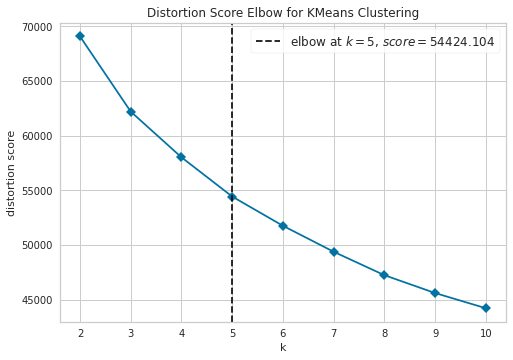

In [11]:
plot_model(kmeans, plot = 'elbow')

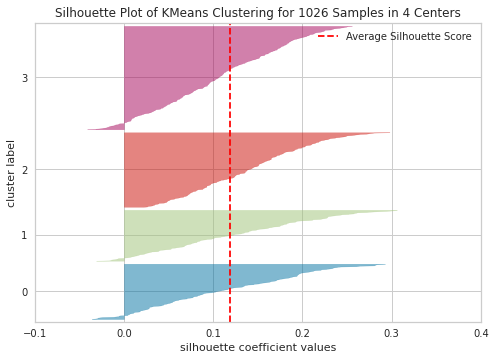

In [12]:
plot_model(kmeans, plot = 'silhouette')

In [13]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m,Cluster 2
1,311_3,0.704633,0.802537,0.350110,2.467733,5.548400,0.205323,0.165058,2.107281,0.171401,...,0.454509,0.111089,0.157731,0.158543,1.404481,Control,Memantine,C/S,c-CS-m,Cluster 2
2,321_4,0.505093,0.695549,0.376029,2.915585,5.917957,0.226734,0.174271,2.663039,0.190038,...,0.591586,0.131515,0.188391,NaN,1.699260,Control,Memantine,C/S,c-CS-m,Cluster 0
3,3415_12,0.429133,0.563175,0.258429,2.028151,3.542553,0.214075,0.176759,3.165139,0.167430,...,0.371618,0.118223,0.171071,0.173702,1.405727,Control,Memantine,C/S,c-CS-m,Cluster 1
4,3415_15,0.373648,0.471165,0.257909,1.860032,2.938526,0.218262,0.150380,2.610132,0.142571,...,0.277665,0.086785,0.126537,0.112690,0.790975,Control,Memantine,C/S,c-CS-m,Cluster 1
